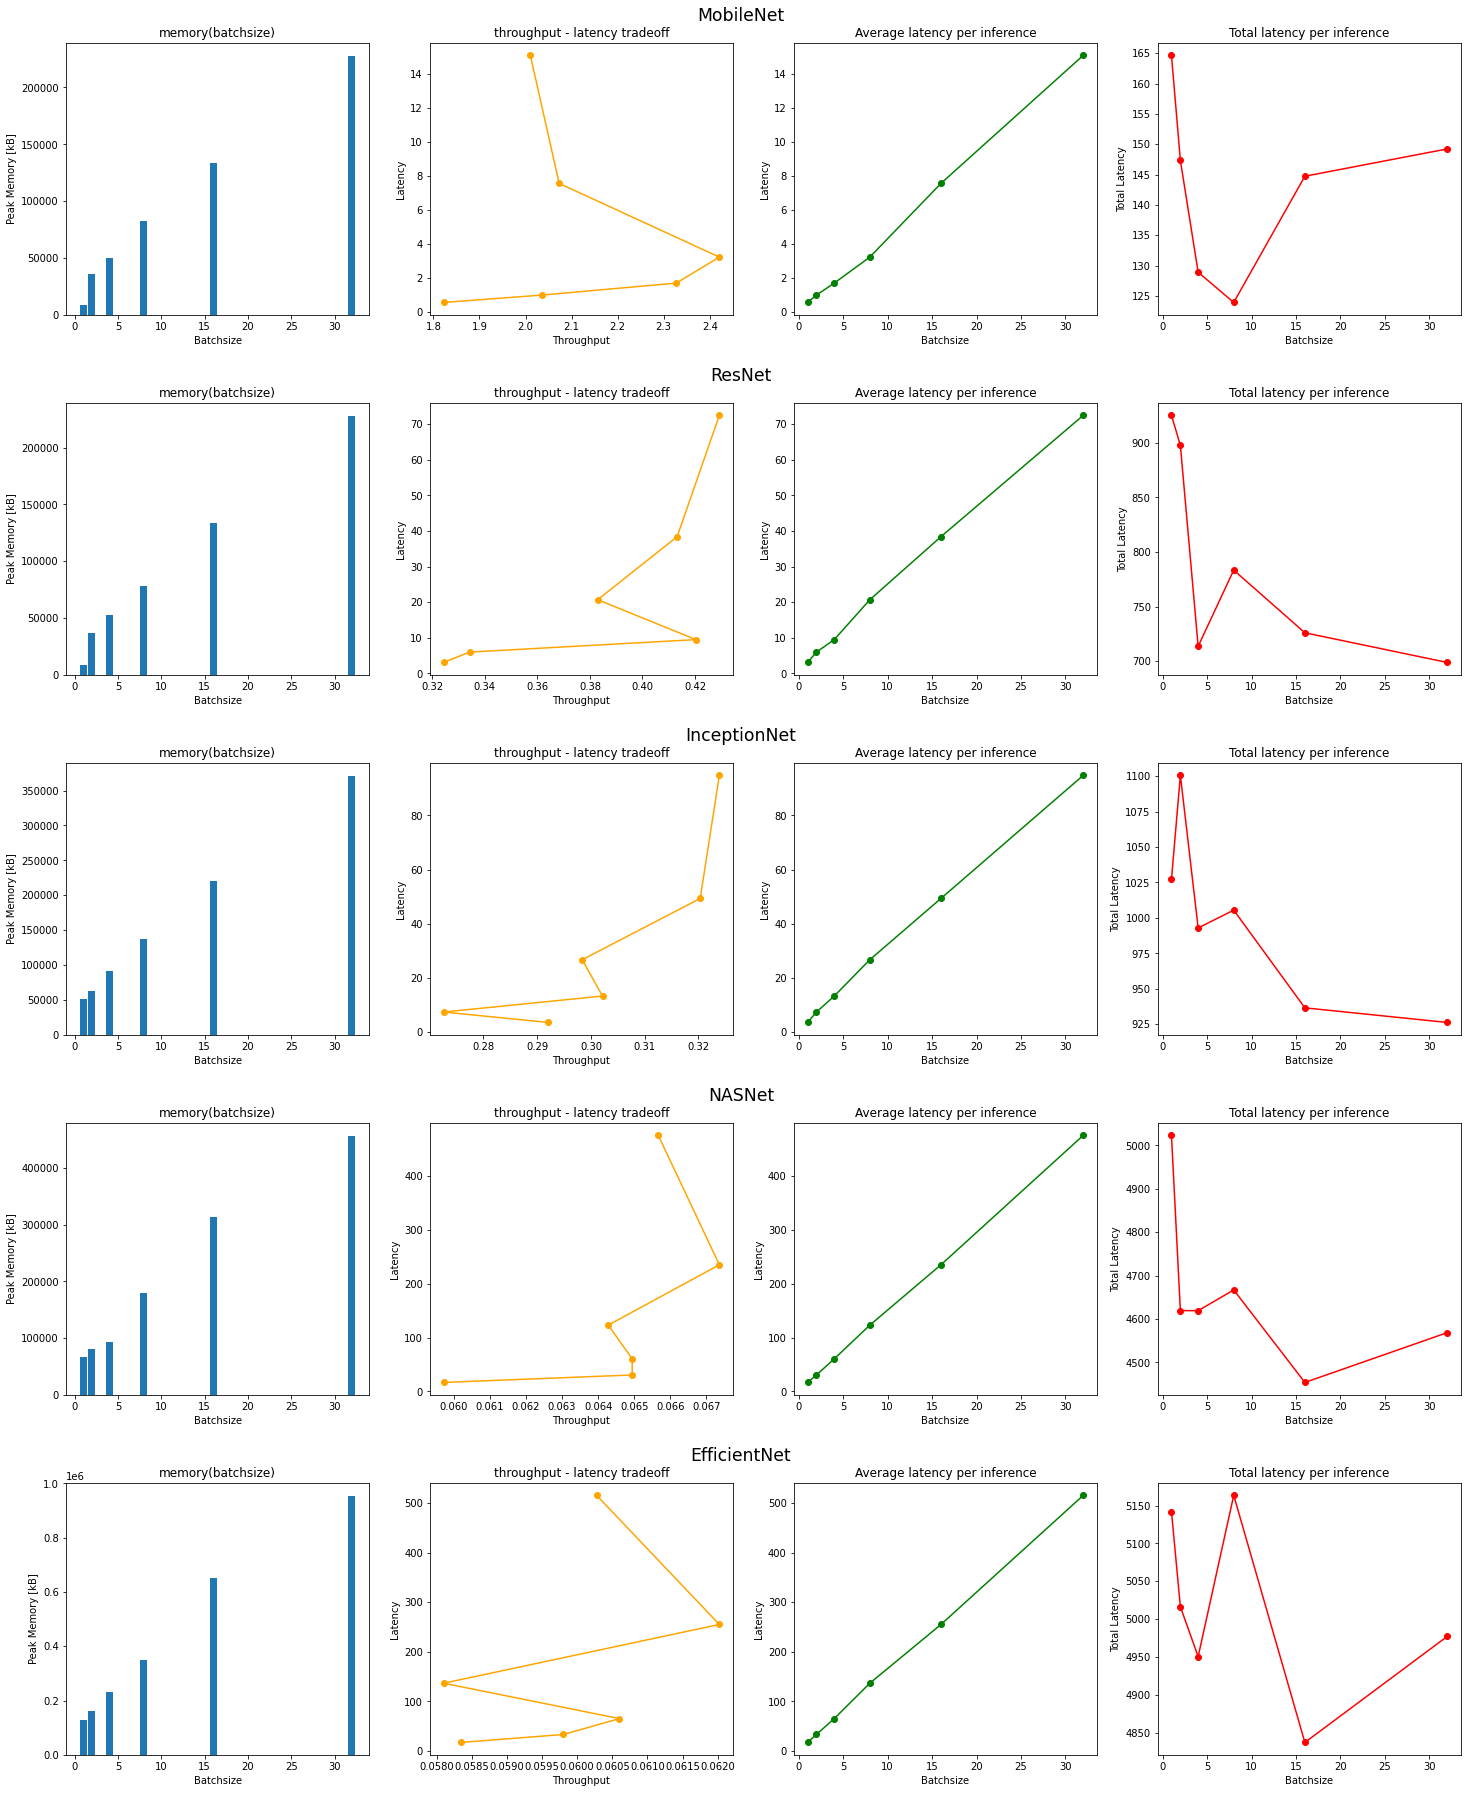

In [43]:
import ast
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

data = pd.DataFrame(columns=['memory','avglat','tlat','throughput','batchsize','model'])

for filename in os.listdir('./batches'):

    file = open('./batches/'+filename, 'r')
    Lines = file.readlines()
    file.close()

    tlat = []
    avglat = []
    throughput = []
    batch = []
    memory = []

    for line in Lines:
        temp = ast.literal_eval(line)
        memory.append(temp['memory']) #peak memory per total inference
        avglat.append(((temp['batch']*sum(temp['latency'][:-1]))+((300%temp['batch'])*temp['latency'][-1]))/300)
        tlat.append(sum(temp['latency'])) #total latency
        #avglat.append(np.mean(temp['latency'][:-1])) #avg latency per batch
        #throughput.append(temp['throughput'])
        throughput.append(float(300/sum(temp['latency'])))
        batch.append(temp['batch'])

    data = data.append(pd.DataFrame({'memory':memory,'avglat':avglat,'tlat':tlat,'throughput':throughput,'batchsize':batch,'model':np.full(len(batch), filename[-5])}),ignore_index=True)

fig = plt.figure(figsize=(25,25))

# create 5x1 subfigs
subfigs = fig.subfigures(nrows=5, ncols=1)
models = ['MobileNet','ResNet','InceptionNet','NASNet','EfficientNet']
for row, subfig in enumerate(subfigs):
    subfig.suptitle(models[row],size='xx-large')

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=4)
    
    df = data.loc[data['model'] == str(row+1)]
  
    axs[0].bar(df['batchsize'],df['memory'])
    axs[0].set_title('memory(batchsize)')
    axs[0].set_xlabel('Batchsize')
    axs[0].set_ylabel('Peak Memory [kB]')

    axs[1].plot(df['throughput'],df['avglat'],c='orange',marker='o')
    axs[1].set_title('throughput - latency tradeoff')
    axs[1].set_xlabel('Throughput')
    axs[1].set_ylabel('Latency')

    axs[2].plot(df['batchsize'],df['avglat'],c='green',marker='o')
    axs[2].set_title('Average latency per inference')
    axs[2].set_xlabel('Batchsize')
    axs[2].set_ylabel('Latency')

    axs[3].plot(df['batchsize'],df['tlat'],c='red',marker='o')
    axs[3].set_title('Total latency per inference')
    axs[3].set_xlabel('Batchsize')
    axs[3].set_ylabel('Total Latency')  
    
